- Analyze Bankloan.csv
    - Features: Emploty, Debtinc, creddebt, othdebt
    - Target: Default
- Random state 2020, splitting 80:20 stratified
1. Modeling compute accuracy, recall and another metrics using stratified CV 5 fold: 
    - a logistic regression(solver liblinear), 
    - b. KNN (K=5), 
    - c Tree (Criterion entropy, max_depth 5)
2. Compute recall, precision, f1 score and make ROC, PRC from logistic regression (solver liblinear) in test
3. Simple Hyperparameter tuning: (optimize c) optimized by f1 and using training 60% validation 20 and test 20%
4. COmpalre the result (before and after)
5. Grid Search CV Hyperparameter tuning: (Optimize c and max_iter) optimize by f1 and using stratified cv 5 fold
6. compare the result before and after

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, average_precision_score, plot_precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

# DATA

In [3]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\Help\Purwadhika\Csv_Files\bankloan.csv')
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


# DATA SPLITTING

In [4]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
x = df[fitur]
y = df['default']

In [9]:
x_trainval, x_test, y_trainval, y_test = train_test_split(
    x,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2020
)

In [10]:
logreg = LogisticRegression(solver = 'liblinear', random_state=2020)
knn = KNeighborsClassifier(n_neighbors= 5)
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 5, random_state=2020)

In [17]:
skfold = StratifiedKFold(n_splits = 5)

logreg_cv = cross_val_score(logreg, x_trainval, y_trainval, cv = skfold, scoring = 'f1')
knn_cv = cross_val_score(knn, x_trainval, y_trainval, cv = skfold, scoring = 'f1', error_score= 'raise')
tree_cv = cross_val_score(tree, x_trainval, y_trainval, cv = skfold, scoring = 'f1', error_score= 'raise')

In [18]:
print('Hasil Cross Validasi', logreg_cv)
print('Hasil Mean Cross Validasi', logreg_cv.mean())
print('Hasil STD Cross Validasi', logreg_cv.std())

Hasil Cross Validasi [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
Hasil Mean Cross Validasi 0.543564482325905
Hasil STD Cross Validasi 0.06927688261828344


In [19]:
print('Hasil Cross Validasi', knn_cv)
print('Hasil Mean Cross Validasi', knn_cv.mean())
print('Hasil STD Cross Validasi', knn_cv.std())

Hasil Cross Validasi [0.46153846 0.36       0.44897959 0.35897436 0.33333333]
Hasil Mean Cross Validasi 0.3925651491365777
Hasil STD Cross Validasi 0.05222479352609521


In [20]:
print('Hasil Cross Validasi', tree_cv)
print('Hasil Mean Cross Validasi', tree_cv.mean())
print('Hasil STD Cross Validasi', tree_cv.std())

Hasil Cross Validasi [0.66666667 0.36363636 0.55319149 0.27027027 0.48      ]
Hasil Mean Cross Validasi 0.46675295798700056
Hasil STD Cross Validasi 0.13917691859588774


# Model Perfomance in Test

In [21]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_trainval, y_trainval)

LogisticRegression(solver='liblinear')

In [22]:
y_pred = logreg.predict(x_test)

In [23]:
f1_score, recall_score, precision_score

(<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

In [26]:
print('recall:', recall_score(y_test, y_pred)) # DEFAULT 1 ( DARI TARGET SUATU VARIABEL)
print('precision:', precision_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))

recall: 0.4864864864864865
precision: 0.782608695652174
f1: 0.6000000000000001


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



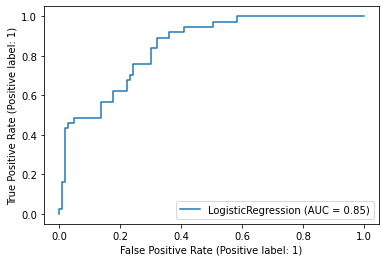

In [27]:
plot_roc_curve(logreg, x_test, y_test)

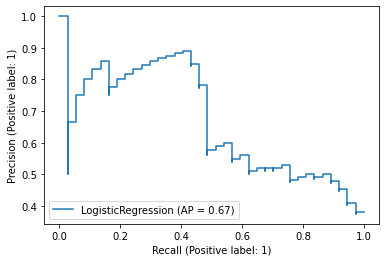

In [28]:
plot_precision_recall_curve(logreg, x_test, y_test)

# Simple Hyperparameter for Logistic Regression

In [30]:
x_train, x_val, y_train, y_val = train_test_split(
    x_trainval,
    y_trainval,
    stratify = y_trainval,
    test_size = 0.2,
    random_state = 20
)

In [31]:
hyperparam_c = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
best_score = 0
val_score = []

for i in hyperparam_c:
    #FITTING MODEL
    logreg = LogisticRegression(solver='liblinear', C = i)
    logreg.fit(x_train, y_train)

    # PERHITUNGAN SKOR SETIAP I/HYPERPARAM
    y_pred_val = logreg.predict(x_val)
    score_tmp = f1_score(y_val, y_pred_val)

    # PENENTUAN SKOR TERBAIK
    if score_tmp > best_score:
        best_score = score_tmp
        best_param = i

In [32]:
print('Skor terbaik', best_score)
print('Hyper terbaik', best_param)

Skor terbaik 0.6538461538461539
Hyper terbaik 0.1


# perbandingan sebelum dan sesudah tuning

In [34]:
logreg_after = LogisticRegression(solver='liblinear', C = 0.1)
logreg_before = LogisticRegression(solver='liblinear', C = 1)

In [35]:
logreg_before.fit(x_trainval, y_trainval)
y_pred = logreg_before.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [36]:
logreg_after.fit(x_trainval, y_trainval)
y_pred = logreg_after.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       103
           1       0.72      0.49      0.58        37

    accuracy                           0.81       140
   macro avg       0.78      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



1. Improvement pada validation score belum signifikan
1. Pemilihan C kurang baik
1. Bisa jadi Test Set kebetulan yang sulit diprediksi

TRAIN - VAL - TEST --> DATA SANGAT BESAR (JUTTAN) --> SPARK

# HYPERPARAMETER FOR LOGISTIC REGRESSION WITH GRID SEARCH (CROSS VALIDASI)

In [39]:
hyperparam_c = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005],
    'max_iter':[100,200,300,400,500,1000]
}

skfold = StratifiedKFold(n_splits = 5) # SETIAP SPLIT MEMILIKI PROPORSI DEFAULT YANG SAMA
logreg = LogisticRegression(solver='liblinear', random_state=2020)


grid_search = GridSearchCV(
    logreg,
    param_grid = hyperparam_c,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1
)

In [41]:
grid_search.fit(x_trainval, y_trainval)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=2020,
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             scoring='f1')

In [42]:
grid_search.best_params_

{'C': 0.05, 'max_iter': 100}

In [44]:
grid_search.best_score_

0.5563225088777649

In [49]:
hasil_cv = pd.DataFrame(grid_search.cv_results_)
hasil_cv[hasil_cv['rank_test_score']>10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.007577,0.003316,0.005785,0.002708,1,100,"{'C': 1, 'max_iter': 100}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55
37,0.006980,0.002276,0.006983,0.003278,1,200,"{'C': 1, 'max_iter': 200}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55
38,0.007184,0.002034,0.008574,0.003602,1,300,"{'C': 1, 'max_iter': 300}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55
39,0.007183,0.002310,0.005184,0.001934,1,400,"{'C': 1, 'max_iter': 400}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55
40,0.005384,0.000487,0.013954,0.014398,1,500,"{'C': 1, 'max_iter': 500}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55
41,0.011019,0.001173,0.003998,0.000641,1,1000,"{'C': 1, 'max_iter': 1000}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55
42,0.007381,0.003064,0.005999,0.002540,0.5,100,"{'C': 0.5, 'max_iter': 100}",0.566038,0.439024,0.653846,0.530612,0.518519,0.541608,0.069816,61
43,0.007768,0.002832,0.007379,0.002794,0.5,200,"{'C': 0.5, 'max_iter': 200}",0.566038,0.439024,0.653846,0.530612,0.518519,0.541608,0.069816,61
44,0.010980,0.003741,0.005633,0.002406,0.5,300,"{'C': 0.5, 'max_iter': 300}",0.566038,0.439024,0.653846,0.530612,0.518519,0.541608,0.069816,61
45,0.006796,0.003072,0.006184,0.002394,0.5,400,"{'C': 0.5, 'max_iter': 400}",0.566038,0.439024,0.653846,0.530612,0.518519,0.541608,0.069816,61


In [54]:
hasil_cv[(hasil_cv['param_C'] == 1)&(hasil_cv['param_max_iter'] == 100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.007577,0.003316,0.005785,0.002708,1,100,"{'C': 1, 'max_iter': 100}",0.566038,0.439024,0.653846,0.530612,0.528302,0.543564,0.069277,55


In [55]:
hasil_cv[(hasil_cv['param_C'] == 0.05)&(hasil_cv['param_max_iter'] == 100)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
54,0.00738,0.003816,0.005809,0.002436,0.05,100,"{'C': 0.05, 'max_iter': 100}",0.528302,0.530612,0.607143,0.56,0.555556,0.556323,0.028436,1


# Perbandingan setelah dan sebelum hyperparameter tuning

In [ ]:
logreg_after = LogisticRegression(solver='liblinear', C = 0.05)
logreg_before = LogisticRegression(solver='liblinear', C = 1)

In [51]:
logreg_before.fit(x_trainval, y_trainval)
y_pred = logreg_before.predict(x_test)
print('before \n', classification_report(y_test, y_pred))

logreg_after.fit(x_trainval, y_trainval)
y_pred = logreg_after.predict(x_test)
print('after \n', classification_report(y_test, y_pred))

before 
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140

after 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       103
           1       0.72      0.49      0.58        37

    accuracy                           0.81       140
   macro avg       0.78      0.71      0.73       140
weighted avg       0.80      0.81      0.80       140



1. Improvement pada validation score blm signifikan
2. pemilihan hyperparam kurang baik
3. bisa jadi test set kebetulan yang sulit di prediksi (random state = 2020)